# EC7212 – Computer Vision and Image Processing

## Assignment 2 – Image Segmentation Tasks in Python

- Reg. No: EG/2020/4047
- Name: LELWALA LGSR


### Import Libraries and show Sample Image

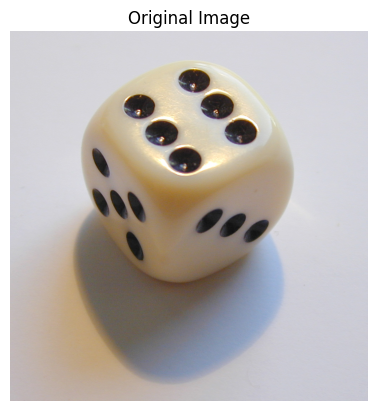

True

In [45]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path



# Load original image
img_path = "sample_image/sample.jpg"
original_img = cv2.imread(img_path)

if original_img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

# Display original image
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

# Save original image
Path("results").mkdir(exist_ok=True)
cv2.imwrite("results/original_image.png", original_img)


## 1  Intensity-Level Reduction

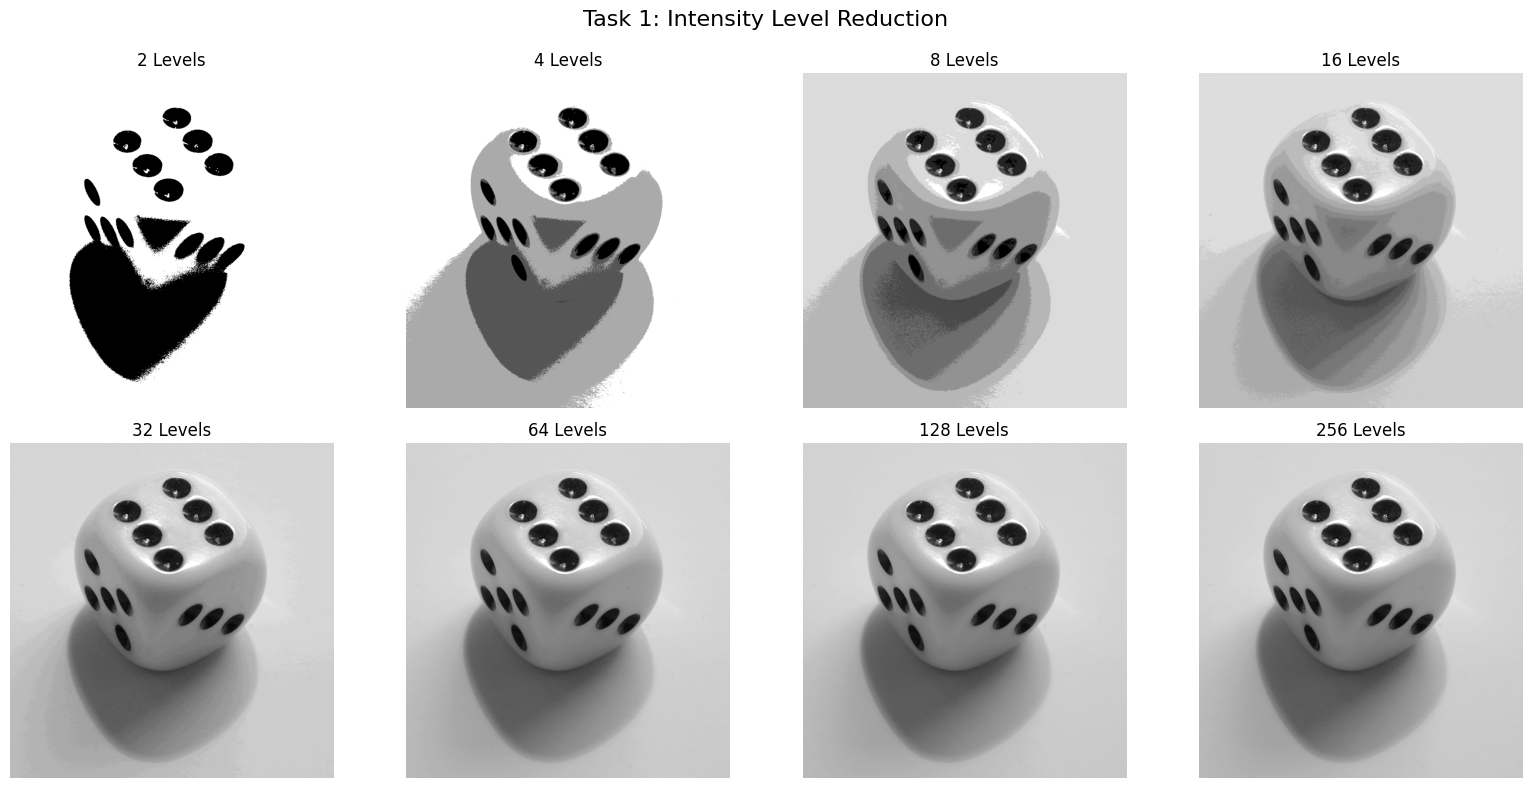

In [46]:

# Convert original image to grayscale
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

# Function to reduce intensity levels (bit-depth)
def reduce_levels(img_gray, levels):

    # Validate that levels is a power of 2 between 2 and 256
    if (levels & (levels - 1)) or levels < 2 or levels > 256:
        raise ValueError("levels must be power of 2 between 2 and 256")
    
    # Calculate the intensity range for each level
    interval = 256 // levels
    
    # Reduce intensity by flooring and rescaling
    return ((img_gray // interval) * interval).astype(np.uint8)

# Define the intensity levels to test (powers of 2)
levels_list = [2, 4, 8, 16, 32, 64, 128, 256]

# Display all reduced images in a grid
plt.figure(figsize=(16, 8))

for idx, lvl in enumerate(levels_list):
    # Reduce the image
    img_reduced = reduce_levels(gray_img, lvl)
    
    # Plot the image
    plt.subplot(2, 4, idx + 1)
    plt.imshow(img_reduced, cmap="gray")
    plt.title(f"{lvl} Levels")
    plt.axis("off")
    
    # Save the image
    cv2.imwrite(f"results/task1_levels_{lvl}.png", img_reduced)

# Show the complete figure
plt.suptitle("Task 1: Intensity Level Reduction", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


## 2  Spatial Averaging Filters

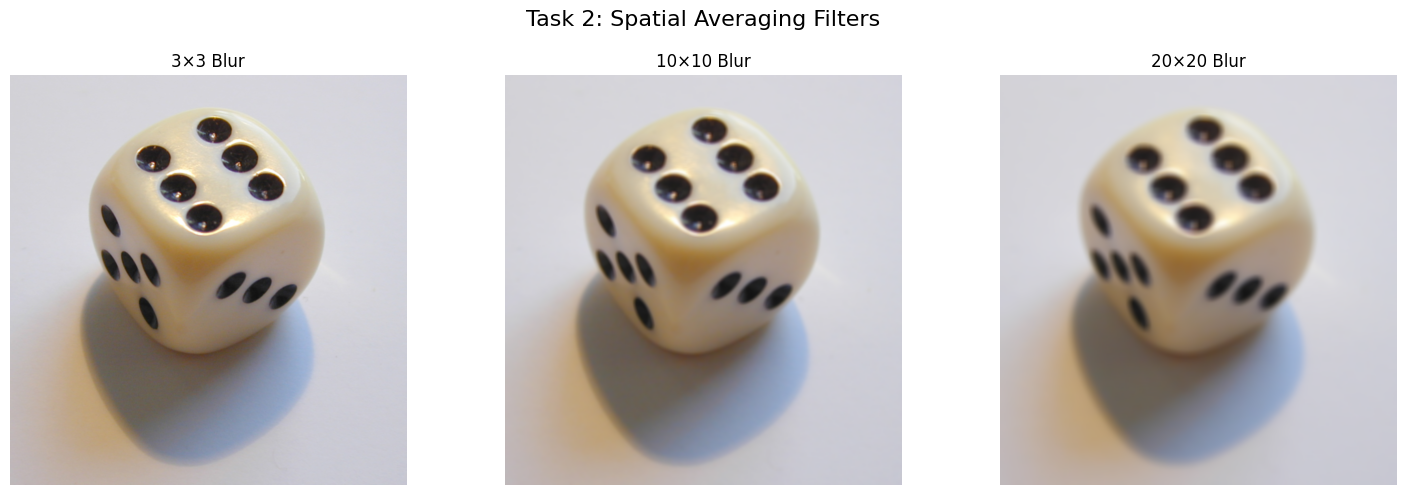

In [47]:

# Function to apply spatial averaging filter (mean filter)
def spatial_average(image, kernel_size):
    
    # Apply blur with the given kernel size (square filter)
    return cv2.blur(image, (kernel_size, kernel_size))

# Define kernel sizes to apply
kernel_sizes = [3, 10, 20]

# Create a figure to display results
plt.figure(figsize=(15, 5))

# Loop over each kernel size
for idx, size in enumerate(kernel_sizes):
    # Apply spatial averaging
    blurred_img = spatial_average(original_img, size)
    
    # Display the result
    plt.subplot(1, 3, idx + 1)
    plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
    plt.title(f"{size}×{size} Blur")
    plt.axis("off")
    
    # Save the result
    cv2.imwrite(f"results/task2_blur_{size}x{size}.png", blurred_img)

# Show final layout
plt.suptitle("Task 2: Spatial Averaging Filters", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


## 3  Image Rotation

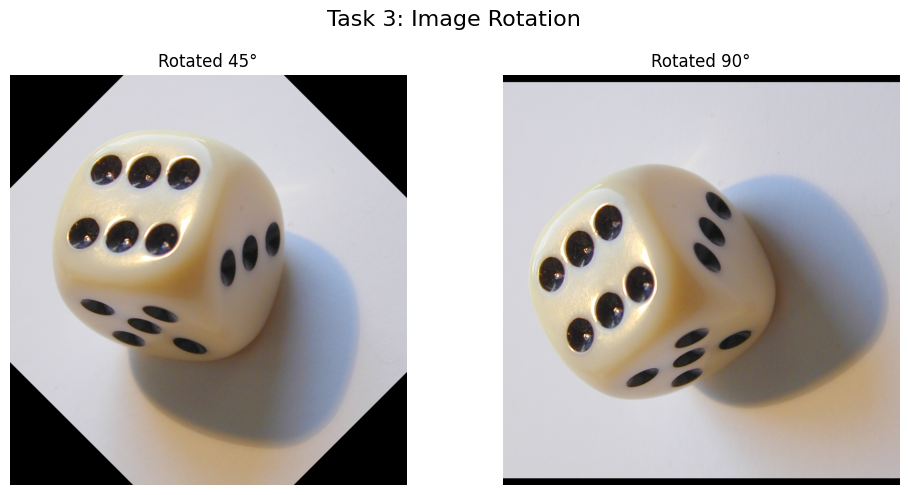

In [48]:

# Function to rotate an image around its center
def rotate_image(image, angle):
    # Get height and width of the image
    h, w = image.shape[:2]
    
    # Define the center of rotation
    center = (w // 2, h // 2)
    
    # Get the rotation matrix using OpenCV
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Perform the rotation
    return cv2.warpAffine(image, M, (w, h))

# Define the angles to rotate
angles = [45, 90]

# Create a figure to display results
plt.figure(figsize=(10, 5))

# Loop through the angles
for idx, angle in enumerate(angles):
    # Rotate image
    rotated_img = rotate_image(original_img, angle)
    
    # Display rotated image
    plt.subplot(1, 2, idx + 1)
    plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Rotated {angle}°")
    plt.axis("off")
    
    # Save rotated image
    cv2.imwrite(f"results/task3_rotated_{angle}.png", rotated_img)

# Show results
plt.suptitle("Task 3: Image Rotation", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


## 4  Block Averaging (Pixelation)

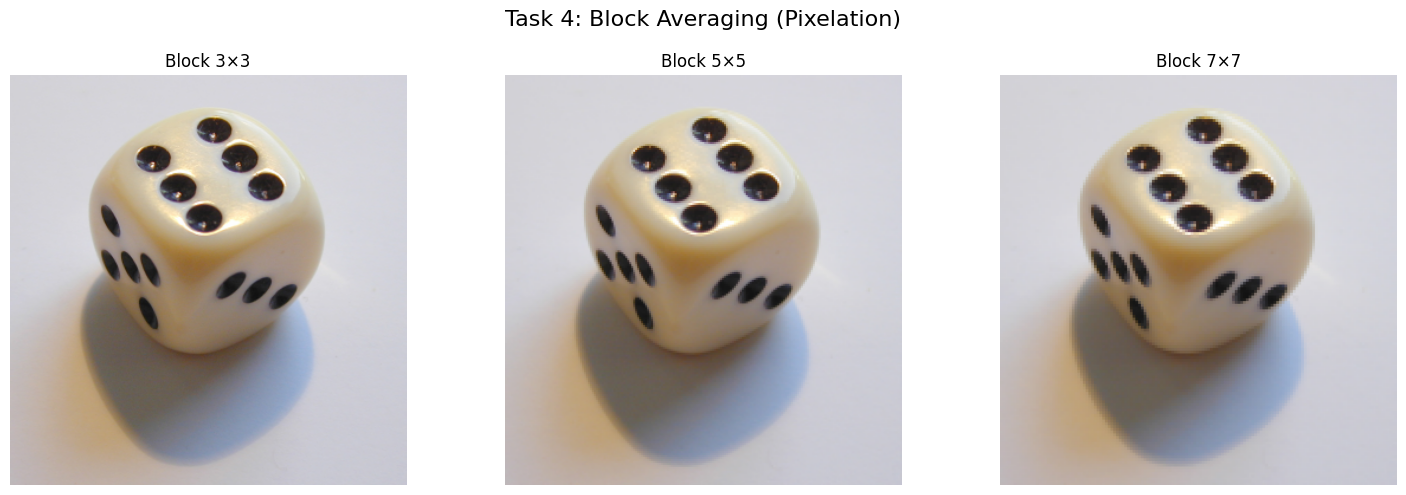

In [49]:

# Function to apply block averaging to reduce spatial resolution
def block_average(image, block_size):
    # Make a copy of the image
    output = image.copy()
    
    # Get image height and width
    h, w = image.shape[:2]
    
    # Loop through image in steps of block size
    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            # Get the block (ROI)
            block = output[y:y+block_size, x:x+block_size]
            
            # Calculate mean color of the block
            mean_color = block.mean(axis=(0,1), dtype=float)
            
            # Assign mean color to the entire block
            output[y:y+block_size, x:x+block_size] = mean_color
    
    return output

# Define block sizes
block_sizes = [3, 5, 7]

# Create figure for output
plt.figure(figsize=(15, 5))

# Apply block averaging for each size
for idx, size in enumerate(block_sizes):
    # Process image
    averaged_img = block_average(original_img, size)
    
    # Show result
    plt.subplot(1, 3, idx + 1)
    plt.imshow(cv2.cvtColor(averaged_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Block {size}×{size}")
    plt.axis("off")
    
    # Save result
    cv2.imwrite(f"results/task4_blockavg_{size}x{size}.png", averaged_img)

# Show all block averaging results
plt.suptitle("Task 4: Block Averaging (Pixelation)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
